In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [249]:
print(tf.__version__)

2.18.0


In [250]:
data = pd.read_csv("https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/refs/heads/master/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [251]:
data.shape

(284807, 31)

In [252]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [254]:
data['Class'].value_counts() # Highly imbalanced dataset 

Class
0    284315
1       492
Name: count, dtype: int64

## Balance Dataset

In [255]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [256]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [257]:
non_fraud = non_fraud.sample(fraud.shape[0], random_state=42)
non_fraud.shape

(492, 31)

In [258]:
data = pd.concat([fraud, non_fraud], ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,76376.0,-1.525978,0.796226,1.172478,-0.947111,0.077071,-1.655590,0.670737,0.051626,-0.887067,...,0.057467,-0.072446,-0.397195,0.825601,0.404932,0.923867,-0.262266,-0.133368,23.00,0
980,60348.0,-0.705795,1.418016,0.993756,0.908646,-0.171163,-0.566892,0.367416,0.421875,-0.736533,...,0.197948,0.655792,-0.048655,0.415045,-0.287710,-0.305466,0.311077,0.161942,2.80,0
981,47151.0,0.995185,-0.147746,-0.108914,1.168451,0.329676,1.182090,-0.316034,0.323043,0.541030,...,-0.050798,0.005680,-0.370879,-1.385989,0.746056,-0.191335,0.070408,0.041460,98.90,0
982,53857.0,-1.197741,3.166857,-3.476764,0.818768,1.310580,-0.445066,0.384113,0.497864,0.552898,...,-0.293749,-0.264981,0.090417,-1.691177,0.032926,-0.285576,0.752378,0.345595,0.89,0


In [259]:
data['Class'].value_counts() # Balanced dataset

Class
1    492
0    492
Name: count, dtype: int64

In [260]:
X = data.drop('Class', axis=1) 
y = data['Class'] 

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [262]:
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [263]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [264]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [265]:
X_train.shape[0], X_train.shape[1]

(787, 30)

In [266]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [267]:
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

## Build CNN Model

In [268]:
epochs = 20
learning_rate = 0.0001
weight_decay = 0.0001

model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(Conv1D(32, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [269]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_28 (Conv1D)              │ (None, 29, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 29, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 29, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_29 (Conv1D)              │ (None, 28, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 28, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │       114,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,457 (466.63 KB)

 Trainable params: 119,265 (465.88 KB)

 Non-trainable params: 192 (768.00 B)

In [270]:
model.compile(
    optimizer= Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [271]:
history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    validation_data=(X_test, y_test),
    verbose=1
)                       # Underfitting : val_accuracy > accuracy

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5493 - loss: 0.9940 - val_accuracy: 0.8731 - val_loss: 0.6070
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8142 - loss: 0.4184 - val_accuracy: 0.8680 - val_loss: 0.5518
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8689 - loss: 0.3570 - val_accuracy: 0.8934 - val_loss: 0.5095
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8523 - loss: 0.3378 - val_accuracy: 0.9239 - val_loss: 0.4665
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8653 - loss: 0.3370 - val_accuracy: 0.9391 - val_loss: 0.4232
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8701 - loss: 0.2958 - val_accuracy: 0.9442 - val_loss: 0.3757
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8988 - loss: 0.2894 - val_accuracy: 0.9492 - val_loss: 0.3405
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9044 - loss: 0.2877 - val_accuracy: 0.9543 - val_loss:

In [272]:
history.history

{'accuracy': [0.6454892158508301,
  0.8221092820167542,
  0.8703938722610474,
  0.8792884349822998,
  0.8856416940689087,
  0.8805590867996216,
  0.8996188044548035,
  0.8945361971855164,
  0.8958068490028381,
  0.9199491739273071,
  0.9110546112060547,
  0.9123252630233765,
  0.9275730848312378,
  0.9275730848312378,
  0.9174078702926636,
  0.926302433013916,
  0.9135959148406982,
  0.9072427153587341,
  0.9212198257446289,
  0.9135959148406982],
 'loss': [0.7691153287887573,
  0.4135637879371643,
  0.3458542823791504,
  0.32332542538642883,
  0.3003213405609131,
  0.28521645069122314,
  0.2978833019733429,
  0.2823430001735687,
  0.27312973141670227,
  0.2291315197944641,
  0.2427159994840622,
  0.25643599033355713,
  0.23259249329566956,
  0.2205137014389038,
  0.21375587582588196,
  0.2201310098171234,
  0.21908973157405853,
  0.23093384504318237,
  0.21433359384536743,
  0.21010006964206696],
 'val_accuracy': [0.8730964660644531,
  0.8680202960968018,
  0.893401026725769,
  0.9238

In [273]:
def plot_learningCurve(history, epochs):
  epoch_range=range(1, epochs+1)
  # plot training & validadion accuracy values
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

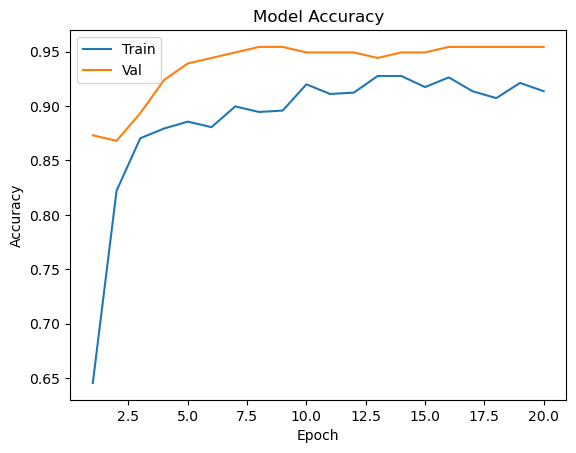

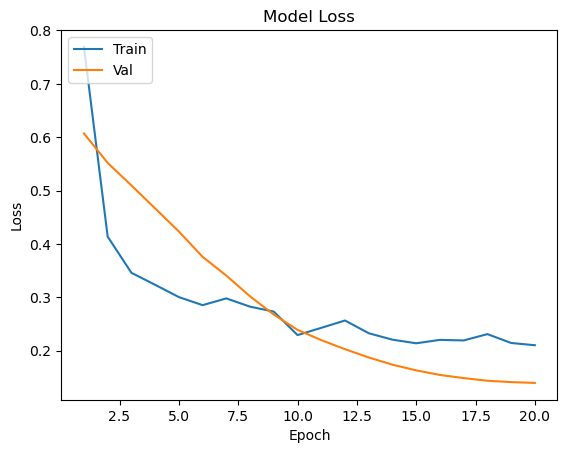

In [274]:
plot_learningCurve(history, epochs)

### Adding MaxPool

In [289]:
epochs = 250     # from 20 to 250
learning_rate = 0.0001
weight_decay = 0.0001

model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))
model.add(Conv1D(32, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [290]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_34 (Conv1D)              │ (None, 29, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 29, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_35 (Conv1D)              │ (None, 13, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 13, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,153 (113.88 KB)

 Non-trainable params: 192 (768.00 B)

In [291]:
model.compile(
    optimizer= Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [292]:
history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5009 - loss: 1.6049 - val_accuracy: 0.6751 - val_loss: 0.6639
Epoch 2/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5791 - loss: 1.0297 - val_accuracy: 0.6041 - val_loss: 0.6439
Epoch 3/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6241 - loss: 0.9718 - val_accuracy: 0.5888 - val_loss: 0.6370
Epoch 4/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6557 - loss: 0.8461 - val_accuracy: 0.5838 - val_loss: 0.6423
Epoch 5/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.6833 - val_accuracy: 0.5838 - val_loss: 0.6487
Epoch 6/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7392 - loss: 0.6416 - val_accuracy: 0.5838 - val_loss: 0.6472
Epoch 7/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7543 - loss: 0.5586 - val_accuracy: 0.5888 - val_loss: 0.6366
Epoch 8/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7746 - loss: 0.5877 - val_accuracy: 0.5990 - v

In [293]:
history.history

{'accuracy': [0.5451080203056335,
  0.5717915892601013,
  0.6124523282051086,
  0.6467598676681519,
  0.6988564133644104,
  0.7522236108779907,
  0.7496823668479919,
  0.7712833285331726,
  0.7878018021583557,
  0.8106734156608582,
  0.8195679783821106,
  0.8106734156608582,
  0.841168999671936,
  0.8449809551239014,
  0.8398983478546143,
  0.8576874136924744,
  0.8627700209617615,
  0.8627700209617615,
  0.865311324596405,
  0.8627700209617615,
  0.889453649520874,
  0.8805590867996216,
  0.8691232800483704,
  0.878017783164978,
  0.890724241733551,
  0.8856416940689087,
  0.8856416940689087,
  0.8881829977035522,
  0.9008894562721252,
  0.8983481526374817,
  0.8881829977035522,
  0.8881829977035522,
  0.9008894562721252,
  0.8970775008201599,
  0.8932655453681946,
  0.9072427153587341,
  0.8881829977035522,
  0.8970775008201599,
  0.9034307599067688,
  0.9008894562721252,
  0.9047014117240906,
  0.9047014117240906,
  0.9161372184753418,
  0.9072427153587341,
  0.9059720635414124,
  0

In [294]:
def plot_learningCurve(history, epochs):
  epoch_range=range(1, epochs+1)
  # plot training & validadion accuracy values
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

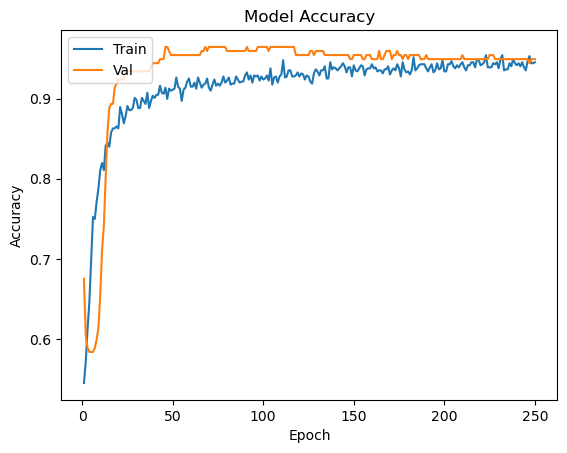

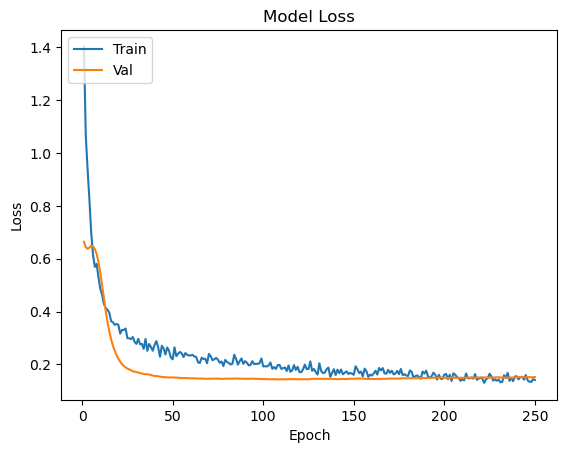

In [295]:
plot_learningCurve(history, epochs)